In [1]:
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split


In [2]:
#load dataset
file_path = Path("Data_Set_Final_LTD_Slope_Intercept.csv")
df = pd.read_csv(file_path)
df.head()

,FIPS_code,County,State,Lung_Cancer,PM2.5,Status_Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable


In [3]:
#remove unnecessary columns
cleaned_df = df.drop(columns=['FIPS_code','County', 'State','Status_Variable', 'LTD', 'Intercept', 'Slope', 'Status', 'Inter', 'Slp', 'control', 'treat', 'Local_Treat', 'EQI', 'AAC','RT'])
cleaned_df.head()

,Lung_Cancer,PM2.5,Land_EQI,Sociod_EQI,Built_EQI,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,LCI,UCI
0,73.9,12.06,-0.706591,0.670436,-0.497301,1,15.07,10.661088,123.657648,522.38,4.463225,0.054815,0.388556,0.008080,0.955385,-1.109728,64.3,84.6
1,68.4,11.12,-1.084299,0.553073,0.401585,2,19.99,17.146847,247.742253,540.79,12.875833,0.021069,0.428278,0.001090,0.717964,-0.565911,63.9,73.1
2,76.1,12.36,-1.281470,-1.236294,0.048854,3,15.77,23.257118,183.193624,896.42,19.620539,0.014027,0.199725,0.000513,0.131007,-0.978090,63.3,90.9
3,86.4,12.24,-0.827410,-0.600018,-1.290857,4,14.92,7.630953,127.779935,563.48,2.951976,0.009613,0.211741,0.000225,0.065289,-0.968173,71.2,104.1
4,73.1,12.97,-0.622934,0.296509,-1.262740,5,17.90,8.913795,95.198094,561.94,9.362215,0.022128,0.300100,0.000429,0.402194,-0.718645,64.5,82.6


In [4]:
#define x (features) and y (target) sets

y = cleaned_df["Lung_Cancer"].values
X = cleaned_df.drop("Lung_Cancer", axis=1)

In [5]:
#use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42 )

In [6]:
#create linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients:  [ 3.49165310e-02 -2.97893356e-02 -6.00430407e-02 -8.81100147e-02
  1.79243342e-03 -1.67195120e-02 -1.85201308e-05 -3.11143957e-06
  3.03438832e-07 -7.37167334e-06 -9.90800725e-01 -2.14860054e-01
 -2.03753021e-01  3.71372556e-02  2.68719830e-02  6.22399760e-01
  4.00744018e-01]
y-axis intercept: -0.15605550803758206


In [8]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.999206338853848
Testing Score: 0.9991387624768184


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model with all the features in X
model.fit(X,y)

score = model.score(X,y)
print(f"Score: {score}")

Score: 0.9991918201089061


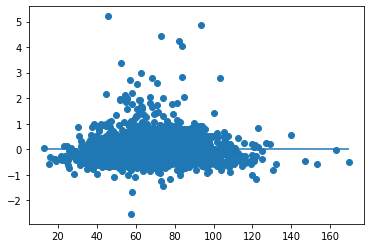

In [10]:
 predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [11]:
from sklearn import model_selection
import pickle

filename = 'linear_regression_model.pt'
pickle.dump(model, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[ 58.49195792  47.15465977  33.2406311   61.59987566  75.32985289
  51.88981002  75.27044806  71.87050105  69.70390291  44.6243541
  84.05244042  56.41896754  49.54812217  62.41110035  83.86214356
  53.10995473  81.32957381  89.47208176  77.54363724  82.1240845
  80.95947425  90.95952752  82.01435628  59.83244198  72.4845023
  38.58091784  99.4824309   44.30231203  72.88214724  81.66595871
  64.8222483   51.60729069  51.34656108  59.11714687  80.23366954
  80.9918034   40.89270453  40.80591033  59.17771359  54.50818394
  59.83885202  48.43799642  62.62687196  86.10771019  57.1872413
  93.25181451  43.96011709  73.09521909  64.84890272  59.66636598
  87.1237875   40.94998302 119.90068287  44.61170466  48.58502691
  66.89875117  53.53094858  63.86338589  75.26223729  56.0493673
  47.93557575  38.91450988  61.70151886  53.4191413   76.48519635
  67.77878176  64.38102954  65.01387354  87.19207105  45.57227642
  61.40172231  66.07376686  62.68444908  83.31406429  76.15833636
  74.55978899  